In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


This is the first dataset to work in Kaggle, I have learn more thing in other platforms, working with more datasets in different data science stuffs and different activities related with machine learning. This time I want to put in practice all that I have done. Starting from the bottom with this project.

# Load the data 

First of all, we loaded the data. We have 3 files. *Train.csv* contains all the training data for our excersise; *test.csv* contain more data with the except of the 'Survived' column. This is our output. The last file *gender_submission.csv* is an example of the final submission (no need it).

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The tutorial propose a simple decision tree to resolve the problem using as features:
* PcClass
* Sex
* SibSp
* Parch

First, I checked if there is missing values in this features and then (to trying improve the decision Tree) I decided to use a grid search looking for the better parameters of estimators and depth.

### Hyperparameter Tunning


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])




# Define hyperparameter grid
param_grid = {
    'n_estimators': [150, 180, 200,175,190],
    'max_depth': [None, 5, 4, 6,7,3],
}

# Create an instance of RandomForestClassifier
model = RandomForestClassifier(random_state=1)

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Display the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'max_depth': 3, 'n_estimators': 180}


In [5]:
model = RandomForestClassifier(n_estimators=180, max_depth=3, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


The tutorial finish here. But let's try something more. Adding notes about Decision Trees and following the book "Introduction to Machine Learning with Python" from O'Reilly

### Decision Trees

Widely used for classification and regression tasks. They learn a hierarchy of if/else questions, leading to a decision.

In [6]:
from sklearn.tree import DecisionTreeClassifier
#Get dummies, convert all categorical features to a number features

#We still use the features of the tutorial + embarked

features = ["Pclass", "Sex", "SibSp", "Parch","Survived","Embarked"]

df = pd.get_dummies(train[features])
df.head()

,Pclass,SibSp,Parch,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,0,False,True,False,False,True
1,1,1,0,1,True,False,True,False,False
2,3,0,0,1,True,False,False,False,True
3,1,1,0,1,True,False,False,False,True
4,3,0,0,0,False,True,False,False,True


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)  # X contains all columns except 'Survived'
y = df['Survived']  # y contains the 'Survived' column

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This line uses the train_test_split function to divide the data into training and testing sets. The test_size parameter determines the proportion of the data that will be used for the testing set (in this case, 20%). The random_state parameter is set to 42 to ensure reproducibility, meaning that if you run this code multiple times, you'll get the same split each time.

The resulting variables (X_train, X_test, y_train, y_test) contain the training and testing sets of features and target labels, respectively. These sets can then be used to train and evaluate the model.

In [8]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.793


In [9]:
tree_depth = tree.tree_.max_depth

print("Depth of the decision tree: {}".format(tree_depth))

Depth of the decision tree: 10


 * ***Unpruned trees are therefore prone to overfitting and not generalizing
well to new data.***

In [10]:
#Changing the depth of the tree
tree = DecisionTreeClassifier(max_depth = 6, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.829
Accuracy on test set: 0.793


## Analyzing the decision Tree

In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot",
                class_names = ['survived','unsurvived'],
                feature_names = X.columns,
                impurity=False, filled=True)

The Visualization of the tree provides a great in-deapth view of how the algorithm makes predictions.

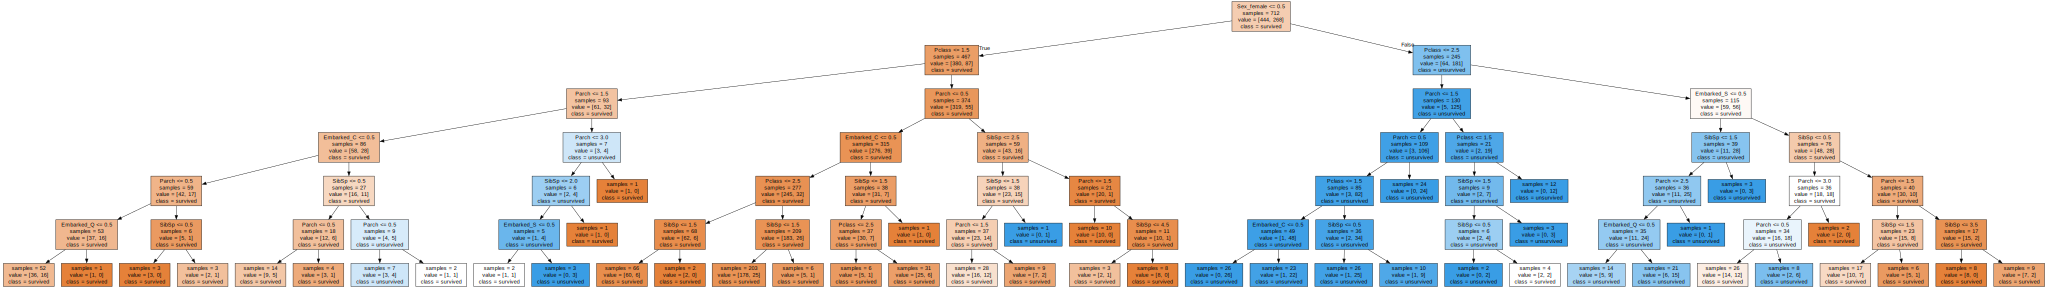

In [12]:
import graphviz
with open("tree.dot") as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

In [13]:
"""
#Export PNG
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

# Crear un objeto Source y exportar a PNG
graph = graphviz.Source(dot_graph, format="png")
graph.render(filename='tree', cleanup=True, view=True)
"""

'\n#Export PNG\nimport graphviz\n\nwith open("tree.dot") as f:\n    dot_graph = f.read()\n\n# Crear un objeto Source y exportar a PNG\ngraph = graphviz.Source(dot_graph, format="png")\ngraph.render(filename=\'tree\', cleanup=True, view=True)\n'

### Featuring importance in trees

How important each feature is for the decision a tree makes. It's a number between 0 and 1 for each feature.

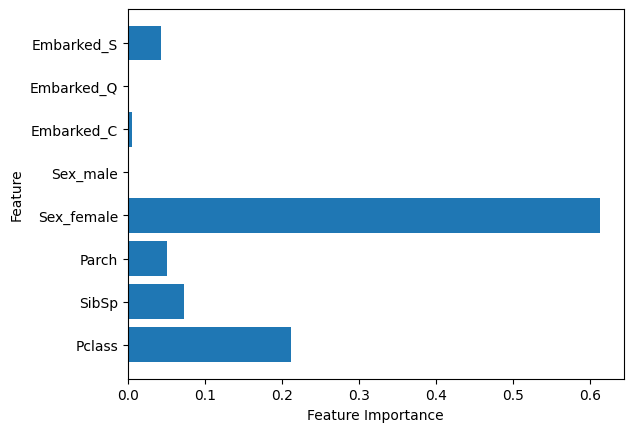

In [14]:
import matplotlib.pyplot as plt

def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),X.columns)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    
plot_feature_importance(tree)

Here we see that the feature used in the top split ("sex_female") is the most important feature. If a feature has a low feature_importance it doesn't mean that the feature is uninformative. It only means that the feature was not picked by the tree, likely because another feature encodes the same information. (e.g sex_male was not picket because sex_female separate well the information). control one of the pre-pruning strategies-setting is sufficient to prevent overfitting (max_depth, max_leaf_nodes, or min_samples_leaf).

### Advantages
* The model can easily be visualized and understood
* The algorithms are invariant to scaling of data
* No normalization or standardization of features is needed

### Weaknesses
* They tend to overfit and provide poor generalization performance.

***A solution: Ensembles Decision Trees like Random forests and Gradient boosted Regression Trees***

#### 1. Random Forests
collection of decision trees

In [15]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 1)
forest.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.843
Accuracy on test set: 0.793


The random forest give us an accuracy of 84.3% better than just the decission Tree. Against the test we still have the same performance.

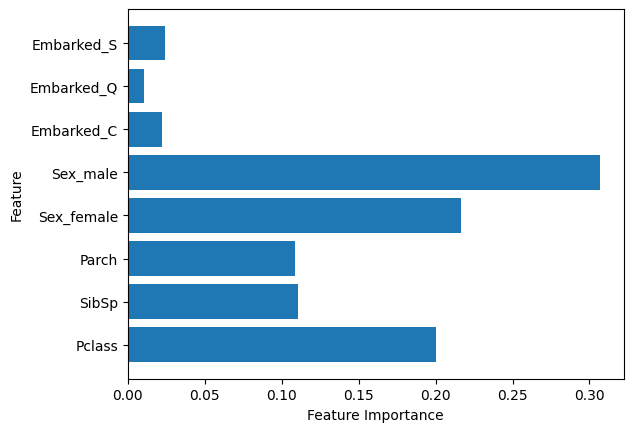

In [16]:
plot_feature_importance(forest)

The random forest still give a lot of importance to sex_female feature but it actually choose sex_male feature to be the most informative feature overall. Also, you can see the the random forest give nonzero importance to many more features than single tree.

### Strengths
* Work well without heavy tuning of the parameters
* don't require scaling of the data

### Weaknesses
* Don't tend to perfom well on very high dimensional, sparse data, such as text data. Use linear model.

#### PARAMETER: 
The important parameter to adjust are:
* n_estimators: larger is always better, but need more memory and more time, "as many as you have time/memory for"
* max_features: determines how random each tree is. Smaller max feature reduce overfitting. good rule is use the default value - max_features=sqrt(n_features) for classification and max_fea
 tures=log2(n_features) for regression
* max_depth. 

***USE WHEN: Compact representation of the decision making process. If you need to summarize the prediction making in a visual way to nonexperts, choose decision treee***

#### 2. Gradient boosted regression trees

*despite the "regression" in the name, it also can be use for classification*

In contrast to the random forest approach, gradient boosting works by building trees in a serial manner, where each tree tries to correct the mistakes of the previous one.

Gradient boosted trees are frequently the winning entries in machine learning competitions, and are widely used in industry. They are generally a bit more sensitive to parameter settings than random forests, but can provide better accuracy if the parameters are set correctly

In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=7, max_depth=3,learning_rate=0.01)
gbrt.fit(X_train,y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.816
Accuracy on test set: 0.793


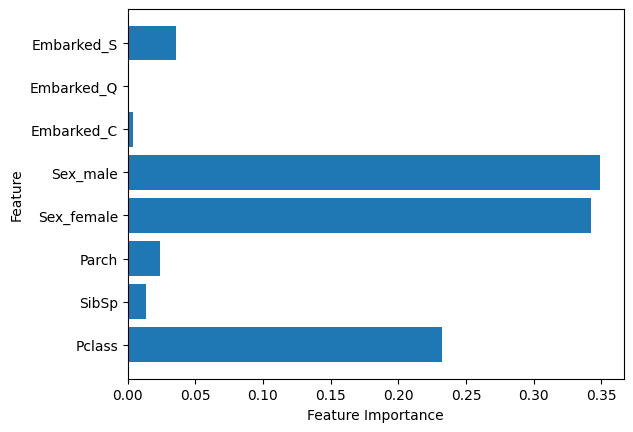

In [18]:
plot_feature_importance(gbrt)

In spite of expect a better perfomance from the model against the random forest, we can see that the random forest continua hold the best performance to the data. 

In other hand, the gradient boosting completely ignored some of the features.

***A common approach is to firts try random forest, which work quite robustly. If it works well but prediction time is at a premium, or it is important to squeeze out the last percentage of accuracy from the machine learning model, moving to gradient boosting often helps.***

### Strengths
* Most powerful and widely used models for Supervised learning.
* Similarly to other tree-based models, the algorithm works well without scaling  and on a mixture of binary and continuous features.
### Weaknesses
* Require careful tuning of the parameter and may take a long time to train. 
* As with other tree-based models, it also often does not work well on high-dimensional sparse data.

#### PARAMETER: 
* n_estimators: number of trees
* learning_rate: control the degree of wich each tree allowed to correct the mistakes of the previus trees.

*Lower learning_rate means more trees are needed to build a model of similar complexity. higher n_estimators is always better but will overfitting.*

*A common practice is to fit n_estimators depending of the time and memory budget and then search over diferents learnng_rates*

### Summary


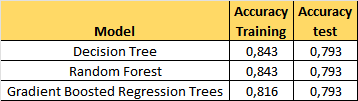